## Play around with the data

In [8]:
import pandas as pd
import pickle as pkl
import numpy as np
from sklearn.decomposition import PCA, FactorAnalysis
from factor_analyzer import FactorAnalyzer
from sklearn.cross_decomposition import CCA
import matplotlib.pyplot as plt
from mca import MCA

label, rev_index, features = pkl.load(open('./data/feature_index_all.pkl','rb'))
Lindel_training = pd.read_csv("./data/Lindel_training.txt", sep='\t')
Lindel_test = pd.read_csv("./data/Lindel_test.txt", sep='\t')

print("Number of labels : ", len(label.keys()))
print("Number of rev_index : ", len(rev_index.keys()))
print("Number of features : ", len(features.keys()))

# # column descriptions
# Lindel_training.iloc[0] # guide sequences
# Lindel_training.iloc[1:3034] # 3033 binary features [2649 MH binary features + 384 one hot encoded features]
# Lindel_training.iloc[3034:] # 557 observed outcome frequencies

# Merge training and test set for dimensionality reduction
all_data = pd.concat([Lindel_training, Lindel_test])
data_features = all_data.iloc[:, 1:3034]

Number of labels :  557
Number of rev_index :  557
Number of features :  2649


In [2]:
# Clean up data
features = dict(sorted(features.items(), key=lambda item: item[1]))
feature_labels = list(features.keys())
data_MH = all_data.iloc[:, 1:2650].set_axis(feature_labels, axis=1, inplace=False)
data_OHE = all_data.iloc[:, 2650:3034]
data = pd.concat([all_data.iloc[:, 0], data_MH, data_OHE], axis=1)

In [3]:
data

,GCAGCAGGTCTCGAAACTCG,-30+29+0,-30+29+1,-30+29+2,-30+29+3,-30+29+4,-29+29+0,-29+29+1,-29+29+2,-29+29+3,...,0.0.2583,0.0.2584,0.0.2585,0.0.2586,0.0.2587,1.0.440,0.0.2588,0.0.2589,0.0.2590,0.0.2591
0,CGGTCTCTATCAGTCCGGAA,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,GCTTGCTGGCCTCGGACTAT,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,GTTCAGGGCACTCGCGAATT,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,GCTGATCAAGCGCGGTTCAG,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,GCGTCCGTGAGAATCCTATA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
434,NaN,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
435,NaN,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
436,NaN,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
437,NaN,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# RUN DIMENSIONALITY REDUCTIONS

Nr of components :  910
Total Percentage of variance explained =  99.00682254747318


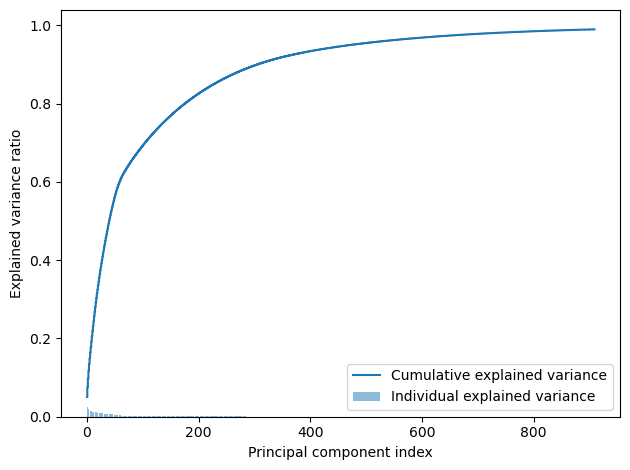

In [4]:
# 1 : PCA

# Instantiate PCA
n_components = 910
pca = PCA(n_components=n_components)

# Determine transformed features
X_train_pca = pca.fit_transform(data.iloc[:, 1:])

# Determine explained variance using explained_variance_ration_ attribute
exp_var_pca = pca.explained_variance_ratio_

# Cumulative sum of eigenvalues; This will be used to create step plot
# for visualizing the variance explained by each principal component.
cum_sum_eigenvalues = np.cumsum(exp_var_pca)
print("Nr of components : ", n_components)
print("Total Percentage of variance explained = ", cum_sum_eigenvalues[-1] * 100)
#
# Create the visualization plot
#b
plt.bar(range(0,len(exp_var_pca)), exp_var_pca, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [5]:
# 2 : MCA
"""
Multiple correspondence analysis (MCA) is an extension of correspondence analysis (CA).
It should be used when you have more than two categorical variables.
The idea is simply to compute the one-hot encoded version of a dataset and apply CA on it.
As an example we're going to use the balloons dataset taken from the UCI datasets website.
"""
mca_obj = MCA(data.iloc[:, 1:])

row_factor_scores = mca_obj.fs_r(percent=0.99)
print("Row factor scores (99% variance explained) shape : ", row_factor_scores.shape)

column_factor_scores = mca_obj.fs_c(percent=0.99)
print("Column factor scores (99% variance explained) shape : ", column_factor_scores.shape)


Row factor scores (99% variance explained) shape :  (4788, 82)
Column factor scores (99% variance explained) shape :  (3033, 82)


In [16]:
# 3 : FA

# Instantiate factor analysis object
from factor_analyzer.factor_analyzer import FactorAnalyzer 
fa = FactorAnalyzer(rotation='varimax')
fa.fit(data.iloc[:, 1:])
# Check Eigenvalues
ev, v = fa.get_eigenvalues()
ev

/home/bram/miniconda3/envs/bio/lib/python3.8/site-packages/factor_analyzer/utils.py:92: RuntimeWarning: invalid value encountered in true_divide
  x = (x - x.mean(0)) / x.std(0)


ValueError: array must not contain infs or NaNs